# Web crawler

In [20]:
import requests
import re
import json
from lxml import etree
headers = {
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.0.0 Safari/537.36'
}
url ='https://www.bilibili.com/bangumi/play/ss24439?spm_id_from=333.337.0.0'
resp = requests.get(url, headers=headers)
print(resp.status_code)
text = resp.content.decode('utf-8')
result = re.findall(r'window.__INITIAL_STATE__=(.*?);', text)
comment_data = {}
if result:
    data = json.loads(result[0])
    epList = data.get('epList', [])
    for item in epList:
        cid = item.get('cid')
        comment_data[cid] = []
        url = f"https://comment.bilibili.com/{cid}.xml"
        res = requests.get(url)
        xml_data = res.content
        with open(f'./{cid}.xml', 'wb') as f:
            f.write(xml_data)
        soup = etree.HTML(xml_data)
        content_all = soup.xpath('//d')
        for content in content_all:
            data = content.xpath('string(.)')
            p = content.xpath('./@p')
            if not p:
                continue
            p = p[0]
            bullet_chat_time, _type, size, color, send_time, pool, uid, row_id, other = p.split(',')
            data = content.xpath('string(.)')
            comment_data[cid].append({
                "bullet_chat_time": bullet_chat_time,
                "type": _type,
                "size": size,
                "color": color,
                "send_time": send_time,
                "pool": pool,
                "uid": uid,
                "row_id": row_id,
                "other": other,
                "message": data
            })
            
with open('AbiteofChina', 'w', encoding='utf-8') as f:
    f.write(json.dumps(comment_data, indent=4, ensure_ascii=False))


200


In [21]:

import requests
from lxml import etree
import jieba
from pyecharts.charts import WordCloud
url = "https://comment.bilibili.com/44978715.xml"
# headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"}
res = requests.get(url)

xml = res.content
soup = etree.HTML(xml)
content_all = soup.xpath('//d')

#Crawl the Danmaku for word segmentation
wordList = []
for content in content_all:
    data = content.xpath('string(.)')
    words = jieba.lcut(data)
    wordList = wordList+words
wordDict = {}
for word in wordList:
    if len(word) > 1:
        if word not in wordDict.keys():
            wordDict[word] = 1
        else:
            wordDict[word] = wordDict[word]+1

#Word cloud visualization
wordCloud = WordCloud()
wordCloud.add(series_name="", data_pair=wordDict.items(),word_size_range=[20,80])
wordCloud.render("wordCloud1.html")

'C:\\Users\\罗文慧\\project\\wordCloud1.html'

In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install matplotlib -i https://pypi.tuna.tsinghua.edu.cn/simple/

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


# Danmaku real-time quantity

2402.08
0.0
4817
第0分钟到第1分钟弹幕数: 431
第1分钟到第2分钟弹幕数: 195
第2分钟到第3分钟弹幕数: 261
第3分钟到第4分钟弹幕数: 218
第4分钟到第5分钟弹幕数: 128
第5分钟到第6分钟弹幕数: 150
第6分钟到第7分钟弹幕数: 82
第7分钟到第8分钟弹幕数: 72
第8分钟到第9分钟弹幕数: 74
第9分钟到第10分钟弹幕数: 77
第10分钟到第11分钟弹幕数: 108
第11分钟到第12分钟弹幕数: 66
第12分钟到第13分钟弹幕数: 83
第13分钟到第14分钟弹幕数: 68
第14分钟到第15分钟弹幕数: 99
第15分钟到第16分钟弹幕数: 114
第16分钟到第17分钟弹幕数: 66
第17分钟到第18分钟弹幕数: 70
第18分钟到第19分钟弹幕数: 92
第19分钟到第20分钟弹幕数: 97
第20分钟到第21分钟弹幕数: 99
第21分钟到第22分钟弹幕数: 87
第22分钟到第23分钟弹幕数: 73
第23分钟到第24分钟弹幕数: 85
第24分钟到第25分钟弹幕数: 100
第25分钟到第26分钟弹幕数: 158
第26分钟到第27分钟弹幕数: 188
第27分钟到第28分钟弹幕数: 226
第28分钟到第29分钟弹幕数: 302
第29分钟到第30分钟弹幕数: 341
第30分钟到第31分钟弹幕数: 66
第31分钟到第32分钟弹幕数: 60
第32分钟到第33分钟弹幕数: 72
第33分钟到第34分钟弹幕数: 61
第34分钟到第35分钟弹幕数: 61
第35分钟到第36分钟弹幕数: 74
第36分钟到第37分钟弹幕数: 52
第37分钟到第38分钟弹幕数: 57
第38分钟到第39分钟弹幕数: 60
第39分钟到第40分钟弹幕数: 42
第40分钟到第41分钟弹幕数: 2


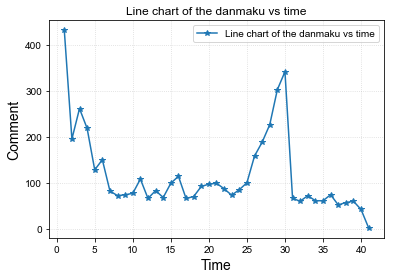

In [19]:
import json
import pandas as pd
from lxml import etree


with open('./48125956.xml', 'rb') as f:
    xml_data = f.read()

comment_list = []
soup = etree.HTML(xml_data)
content_all = soup.xpath('//d')
for content in content_all:
    p = content.xpath('./@p')
    if not p:
        continue
    p = p[0]
    bullet_chat_time, _type, size, color, send_time, pool, uid, row_id, other = p.split(',')
    data = content.xpath('string(.)')
    comment_list.append({
        "bullet_chat_time": bullet_chat_time,
        "type": _type,
        "size": size,
        "color": color,
        "send_time": send_time,
        "pool": pool,
        "uid": uid,
        "row_id": row_id,
        "other": other,
        "message": data
    })


with open('./s.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(comment_list, ensure_ascii=False, indent=4))

with open('./s.json',  encoding='utf-8') as f:
    data = f.read()

data = json.loads(data)
d_dict1 = {}

for item in data:
    for k, v in item.items():
        l1 = d_dict1.get(k, [])
        l1.append(v)
        d_dict1[k] = l1
t1 = 1 * 60
df = pd.DataFrame.from_dict(data)
df['bullet_chat_time'] = df['bullet_chat_time'].astype(float)
max_time = max(df['bullet_chat_time'])
print(max_time)
print(min(df['bullet_chat_time']))
print(df['bullet_chat_time'].shape[0])

title = []
number_list = []
for index, tt in enumerate(range(0, int(max_time), t1)):
    num = df['bullet_chat_time'][(df['bullet_chat_time'] >= tt) & (df['bullet_chat_time'] < (index + 1) * t1)].count()
    print(f"第{tt//60}分钟到第{(index + 1) * t1 // 60}分钟弹幕数: {num}")
    title.append((index + 1) * t1 // 60)
    number_list.append(num)

# from pyecharts.charts import *
#
# print(number_list)
# print(title)
# line = Line()
# line.add_xaxis(title)
# line.add_yaxis('时间', y_axis=number_list)
# line.render()

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
fig, ax= plt.subplots()
ax.set_title('Line chart of the danmaku vs time')  
ax.set_xlabel("Time", fontsize=14)  
ax.set_ylabel("Comment", fontsize=14)  

ax.plot(title, number_list, marker='*', label=u'Line chart of the danmaku vs time')  # Abscissa data + ordinate data + legend


# ax.plot(input_values,lst_temp10,marker='o',label=u'十月份')

plt.legend()  # Make legend effective
# Add gridlines
plt.grid(True, alpha=0.5, axis='both', linestyle=':')
plt.show()


In [7]:
import numpy as np

In [8]:
uid = df.groupby("uid").agg({"send_time" :np.sum})

# Number of Danmaku sent by the user

In [22]:
uid

'e21c90e5'

In [23]:
data = {}
uid = df.groupby("uid")
for name, group in uid:
    key = len(group)
    val = data.get(f"{key}", 0)
    print(val)
    print(type(val))
    val += 1
    data[f"{key}"] = val

0
<class 'int'>
1
<class 'int'>
0
<class 'int'>
2
<class 'int'>
3
<class 'int'>
0
<class 'int'>
4
<class 'int'>
0
<class 'int'>
5
<class 'int'>
6
<class 'int'>
7
<class 'int'>
8
<class 'int'>
9
<class 'int'>
10
<class 'int'>
1
<class 'int'>
11
<class 'int'>
12
<class 'int'>
13
<class 'int'>
14
<class 'int'>
15
<class 'int'>
1
<class 'int'>
16
<class 'int'>
17
<class 'int'>
18
<class 'int'>
2
<class 'int'>
19
<class 'int'>
20
<class 'int'>
21
<class 'int'>
22
<class 'int'>
23
<class 'int'>
0
<class 'int'>
24
<class 'int'>
25
<class 'int'>
26
<class 'int'>
27
<class 'int'>
28
<class 'int'>
3
<class 'int'>
4
<class 'int'>
29
<class 'int'>
30
<class 'int'>
31
<class 'int'>
32
<class 'int'>
33
<class 'int'>
34
<class 'int'>
35
<class 'int'>
36
<class 'int'>
37
<class 'int'>
5
<class 'int'>
1
<class 'int'>
38
<class 'int'>
39
<class 'int'>
40
<class 'int'>
41
<class 'int'>
42
<class 'int'>
43
<class 'int'>
44
<class 'int'>
6
<class 'int'>
45
<class 'int'>
46
<class 'int'>
47
<class 'int'>
48

<class 'int'>
395
<class 'int'>
396
<class 'int'>
397
<class 'int'>
398
<class 'int'>
399
<class 'int'>
400
<class 'int'>
401
<class 'int'>
402
<class 'int'>
403
<class 'int'>
404
<class 'int'>
405
<class 'int'>
406
<class 'int'>
407
<class 'int'>
408
<class 'int'>
409
<class 'int'>
5
<class 'int'>
410
<class 'int'>
411
<class 'int'>
412
<class 'int'>
413
<class 'int'>
414
<class 'int'>
415
<class 'int'>
416
<class 'int'>
417
<class 'int'>
15
<class 'int'>
418
<class 'int'>
63
<class 'int'>
419
<class 'int'>
420
<class 'int'>
421
<class 'int'>
64
<class 'int'>
11
<class 'int'>
422
<class 'int'>
423
<class 'int'>
424
<class 'int'>
425
<class 'int'>
426
<class 'int'>
427
<class 'int'>
428
<class 'int'>
429
<class 'int'>
430
<class 'int'>
431
<class 'int'>
432
<class 'int'>
433
<class 'int'>
434
<class 'int'>
435
<class 'int'>
65
<class 'int'>
436
<class 'int'>
437
<class 'int'>
438
<class 'int'>
439
<class 'int'>
440
<class 'int'>
441
<class 'int'>
442
<class 'int'>
443
<class 'int'>
444

174
<class 'int'>
1071
<class 'int'>
14
<class 'int'>
1072
<class 'int'>
1073
<class 'int'>
2
<class 'int'>
1074
<class 'int'>
1075
<class 'int'>
1076
<class 'int'>
1077
<class 'int'>
44
<class 'int'>
175
<class 'int'>
176
<class 'int'>
1078
<class 'int'>
45
<class 'int'>
1079
<class 'int'>
1080
<class 'int'>
1081
<class 'int'>
1082
<class 'int'>
1083
<class 'int'>
1084
<class 'int'>
1085
<class 'int'>
1086
<class 'int'>
1087
<class 'int'>
1088
<class 'int'>
1089
<class 'int'>
1090
<class 'int'>
1091
<class 'int'>
46
<class 'int'>
177
<class 'int'>
1092
<class 'int'>
1093
<class 'int'>
1094
<class 'int'>
1095
<class 'int'>
178
<class 'int'>
1096
<class 'int'>
1097
<class 'int'>
179
<class 'int'>
1098
<class 'int'>
47
<class 'int'>
1099
<class 'int'>
1100
<class 'int'>
1101
<class 'int'>
1102
<class 'int'>
1103
<class 'int'>
180
<class 'int'>
1104
<class 'int'>
48
<class 'int'>
1105
<class 'int'>
1106
<class 'int'>
1107
<class 'int'>
1108
<class 'int'>
1109
<class 'int'>
1110
<class 'in

1432
<class 'int'>
1433
<class 'int'>
1434
<class 'int'>
221
<class 'int'>
1435
<class 'int'>
222
<class 'int'>
1436
<class 'int'>
1437
<class 'int'>
223
<class 'int'>
1438
<class 'int'>
1439
<class 'int'>
224
<class 'int'>
1440
<class 'int'>
1441
<class 'int'>
1442
<class 'int'>
1443
<class 'int'>
1444
<class 'int'>
1445
<class 'int'>
1446
<class 'int'>
1447
<class 'int'>
225
<class 'int'>
1448
<class 'int'>
226
<class 'int'>
31
<class 'int'>
62
<class 'int'>
1449
<class 'int'>
1450
<class 'int'>
1451
<class 'int'>
0
<class 'int'>
1452
<class 'int'>
1453
<class 'int'>
1454
<class 'int'>
1455
<class 'int'>
1456
<class 'int'>
1457
<class 'int'>
1458
<class 'int'>
1459
<class 'int'>
1460
<class 'int'>
1461
<class 'int'>
1462
<class 'int'>
63
<class 'int'>
1463
<class 'int'>
1464
<class 'int'>
1465
<class 'int'>
227
<class 'int'>
1466
<class 'int'>
1467
<class 'int'>
1468
<class 'int'>
32
<class 'int'>
1469
<class 'int'>
1470
<class 'int'>
1471
<class 'int'>
33
<class 'int'>
1472
<class '

1821
<class 'int'>
1822
<class 'int'>
1823
<class 'int'>
1824
<class 'int'>
1825
<class 'int'>
1826
<class 'int'>
1827
<class 'int'>
1828
<class 'int'>
1829
<class 'int'>
1830
<class 'int'>
1831
<class 'int'>
288
<class 'int'>
1832
<class 'int'>
1833
<class 'int'>
1834
<class 'int'>
1835
<class 'int'>
1836
<class 'int'>
1837
<class 'int'>
84
<class 'int'>
1838
<class 'int'>
289
<class 'int'>
1839
<class 'int'>
1840
<class 'int'>
1841
<class 'int'>
290
<class 'int'>
1842
<class 'int'>
291
<class 'int'>
1843
<class 'int'>
1844
<class 'int'>
292
<class 'int'>
1845
<class 'int'>
1846
<class 'int'>
1847
<class 'int'>
1848
<class 'int'>
1849
<class 'int'>
1850
<class 'int'>
1851
<class 'int'>
1852
<class 'int'>
1853
<class 'int'>
1854
<class 'int'>
1855
<class 'int'>
1856
<class 'int'>
1857
<class 'int'>
1858
<class 'int'>
293
<class 'int'>
1859
<class 'int'>
1860
<class 'int'>
1861
<class 'int'>
1862
<class 'int'>
1863
<class 'int'>
1864
<class 'int'>
294
<class 'int'>
1865
<class 'int'>
18

2182
<class 'int'>
2183
<class 'int'>
2184
<class 'int'>
2185
<class 'int'>
2186
<class 'int'>
2187
<class 'int'>
2188
<class 'int'>
2189
<class 'int'>
2190
<class 'int'>
2191
<class 'int'>
2192
<class 'int'>
2193
<class 'int'>
2194
<class 'int'>
2195
<class 'int'>
104
<class 'int'>
2196
<class 'int'>
2197
<class 'int'>
2198
<class 'int'>
52
<class 'int'>
2199
<class 'int'>
2200
<class 'int'>
53
<class 'int'>
2201
<class 'int'>
2202
<class 'int'>
2203
<class 'int'>
346
<class 'int'>
105
<class 'int'>
2204
<class 'int'>
2205
<class 'int'>
2206
<class 'int'>
347
<class 'int'>
2207
<class 'int'>
2208
<class 'int'>
2209
<class 'int'>
2210
<class 'int'>
2211
<class 'int'>
2212
<class 'int'>
2213
<class 'int'>
348
<class 'int'>
106
<class 'int'>
2214
<class 'int'>
2215
<class 'int'>
2216
<class 'int'>
2217
<class 'int'>
349
<class 'int'>
28
<class 'int'>
2218
<class 'int'>
2219
<class 'int'>
2220
<class 'int'>
2221
<class 'int'>
2222
<class 'int'>
350
<class 'int'>
2223
<class 'int'>
2224
<c

<class 'int'>
2541
<class 'int'>
2542
<class 'int'>
2543
<class 'int'>
2544
<class 'int'>
2545
<class 'int'>
2546
<class 'int'>
2547
<class 'int'>
2548
<class 'int'>
2549
<class 'int'>
402
<class 'int'>
2550
<class 'int'>
2551
<class 'int'>
2552
<class 'int'>
2553
<class 'int'>
2554
<class 'int'>
2555
<class 'int'>
403
<class 'int'>
2556
<class 'int'>
2557
<class 'int'>
2558
<class 'int'>
2559
<class 'int'>
2560
<class 'int'>
2561
<class 'int'>
2562
<class 'int'>
2563
<class 'int'>
2564
<class 'int'>
2565
<class 'int'>
2566
<class 'int'>
57
<class 'int'>
2567
<class 'int'>
2568
<class 'int'>
404
<class 'int'>
2569
<class 'int'>
2570
<class 'int'>
2571
<class 'int'>
2572
<class 'int'>
58
<class 'int'>
2573
<class 'int'>
2574
<class 'int'>
2575
<class 'int'>
2576
<class 'int'>
2577
<class 'int'>
2578
<class 'int'>
36
<class 'int'>
2579
<class 'int'>
2580
<class 'int'>
2581
<class 'int'>
2582
<class 'int'>
121
<class 'int'>
405
<class 'int'>
122
<class 'int'>
2583
<class 'int'>
2584
<clas

In [24]:
data

{'1': 2824,
 '5': 40,
 '2': 443,
 '3': 133,
 '4': 60,
 '8': 7,
 '9': 5,
 '10': 2,
 '6': 12,
 '12': 1,
 '7': 4,
 '11': 2,
 '13': 1}

In [12]:
plt.show()

In [13]:
%matplotlib
%matplotlib inline

Using matplotlib backend: Qt5Agg


In [14]:
plt.show()